In [1]:
import json, os, sys, math
sys.path.append("../scripts/formalism")
from dataset import *
from entropy import *
import pandas as pd
import numpy as np
from tqdm import trange, tqdm
from matplotlib import pyplot as plt
from collections import defaultdict
from pprint import pprint


In [2]:
import matplotlib
from cycler import cycler
from matplotlib.colors import ListedColormap

colors = list(matplotlib.colormaps['tab10'].colors)
CMAP = colors + ['navy', 'olive', 'peru', 'deeppink', 'lightgreen', 'limegreen', 'gold', 'aqua', 'mediumorchid', 'darkred', 'teal']

In [3]:
num_relations = 2
num_nouns = 30

split = "split12"
df = create_synthetic_df(split, num_nouns, transpose=False)

print(relation_centric_entropy3(num_nouns, num_relations, df))
print(relation_centric_entropy4(num_nouns, num_relations, df))
print(relation_centric_entropy5(num_nouns, num_relations, df))
print(divergence(num_nouns, num_relations, df))
print(divergence2(num_nouns, num_relations, df))
print(divergence3(num_nouns, num_relations, df))
print(concept_centric_entropy3(num_nouns, num_relations, df))
print(concept_centric_entropy4(num_nouns, num_relations, df))
print(concept_role_index_entropy(num_nouns, df))


5.4161004022044175
2.708050201102211
2.708050201102211
count_all = 450
-1.3862943611198884
-0.0
-0.0
1.3862943611198884
0.693147180559945
0.0


In [17]:
eval("lambda x, y: int(y * (y//3) * 2 * x)")(1, num_nouns)

3220

### Concept_centric_entropy

In [65]:
entropies = defaultdict(list)
N = list(range(30, 121, 10))
T = True
concept_centric_func = "concept_centric_entropy4"
#entropies = json.load(open("../scripts/formalism/concept_centric_entropy.json", "r"))
#entropies = defaultdict(list, entropies)

In [66]:
for split in ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]:
    for num_nouns in tqdm(N):
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(concept_centric_func)(num_nouns, num_relations, df))

100%|██████████| 10/10 [00:00<00:00, 15.90it/s]


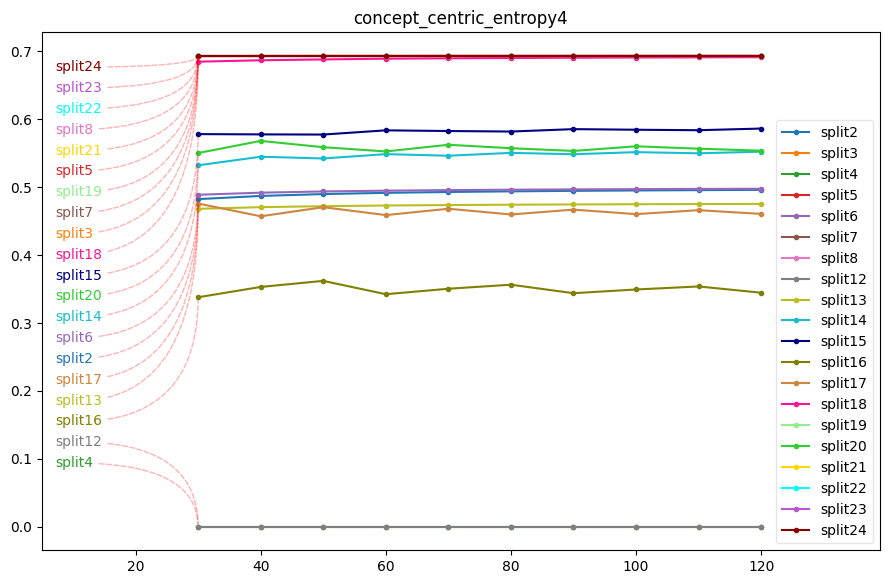

In [67]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 60+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-90"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.title(concept_centric_func)
plt.tight_layout()
plt.show()

In [68]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{concept_centric_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{concept_centric_func}.json", "w"), indent=4)

### Relation_centric_entropy

In [17]:
num_relations = 2
relation_centric_func = "relation_centric_entropy4"
entropies = defaultdict(list)
T = True
N = list(range(30, 121, 10))
#entropies = json.load(open("../scripts/formalism/relation_centric_entropy.json", "r"))
#entropies = defaultdict(list, entropies)

In [18]:
for split in ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]:
    for num_nouns in tqdm(N):
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(relation_centric_func)(num_nouns, num_relations, df))

100%|██████████| 10/10 [00:00<00:00, 18.97it/s]


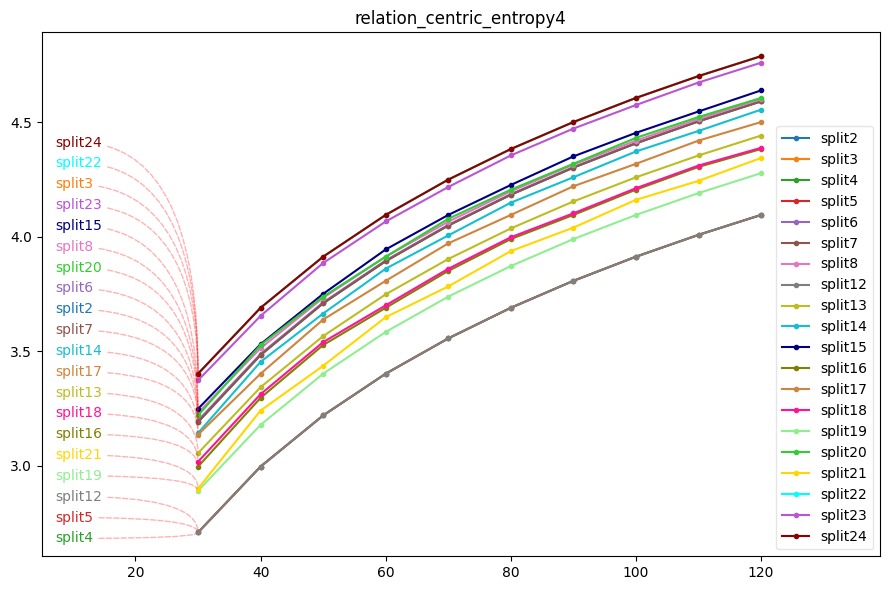

In [19]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 10+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-90"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.title(relation_centric_func)
plt.tight_layout()
plt.show()

In [16]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{relation_centric_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{relation_centric_func}.json", "w"), indent=4)

### Divergence

In [109]:
num_relations = 2
diversity_func = "divergence3"
divergences = defaultdict(list)
T = True
N = list(range(30, 121, 10))
#divergences = json.load(open("../scripts/formalism/relation_scope_divergence.json", "r"))
#divergences = defaultdict(list, divergences)

In [110]:
for split in ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]:
    for num_nouns in tqdm(N):
        df = create_synthetic_df(split, num_nouns, transpose=T)
        divergences[split].append(eval(diversity_func)(num_nouns, num_relations, df))

100%|██████████| 10/10 [00:00<00:00, 13.43it/s]


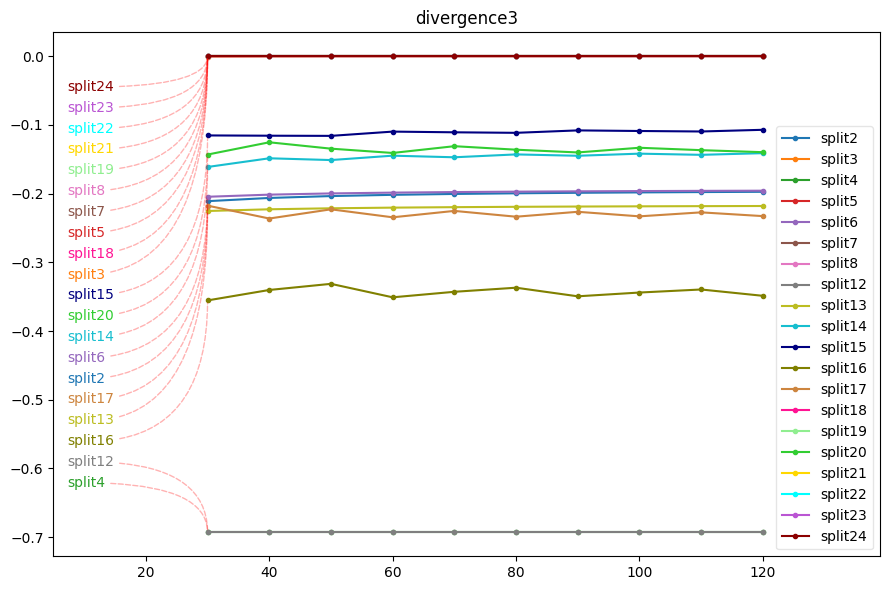

In [111]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in divergences:
    plt.plot(N, divergences[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(divergences.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 50+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-90"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.title(diversity_func)
plt.tight_layout()
plt.show()

In [112]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{diversity_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{diversity_func}.json", "w"), indent=4)

### Concept-Role Bias

In [15]:
num_relations = 2
concept_role_func = "concept_role_entropy"
entropies = defaultdict(list)
T = True
N = list(range(30, 121, 10))


In [16]:
#for split in ["split2", "split12", "split20", "split22", "split23"]:
for split in tqdm(["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]):
    for num_nouns in N:
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(concept_role_func)(num_nouns, df))

100%|██████████| 20/20 [05:12<00:00, 15.63s/it]


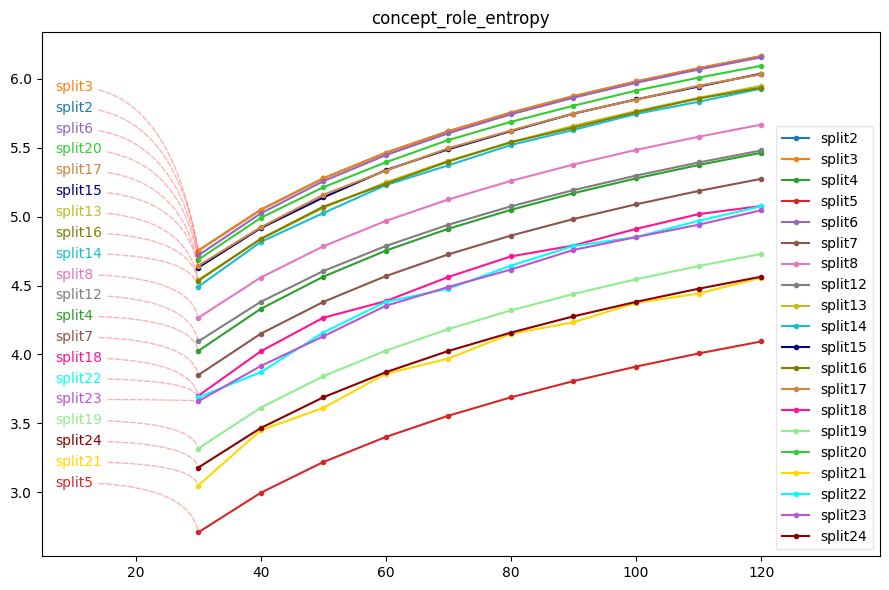

In [17]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 50+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-80"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.title(concept_role_func)
plt.tight_layout()
plt.show()

In [18]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{concept_role_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{concept_role_func}.json", "w"), indent=4)

### Interference between two roles

In [24]:
num_relations = 2
role_interference_func = "role_association2"
entropies = defaultdict(list)
T = False
N = list(range(30, 121, 10))


In [25]:
#for split in ["split2", "split12", "split20", "split22", "split23"]:
for split in tqdm(["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]):
    for num_nouns in N:
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(role_interference_func)(num_nouns, df))

100%|██████████| 20/20 [05:25<00:00, 16.28s/it]


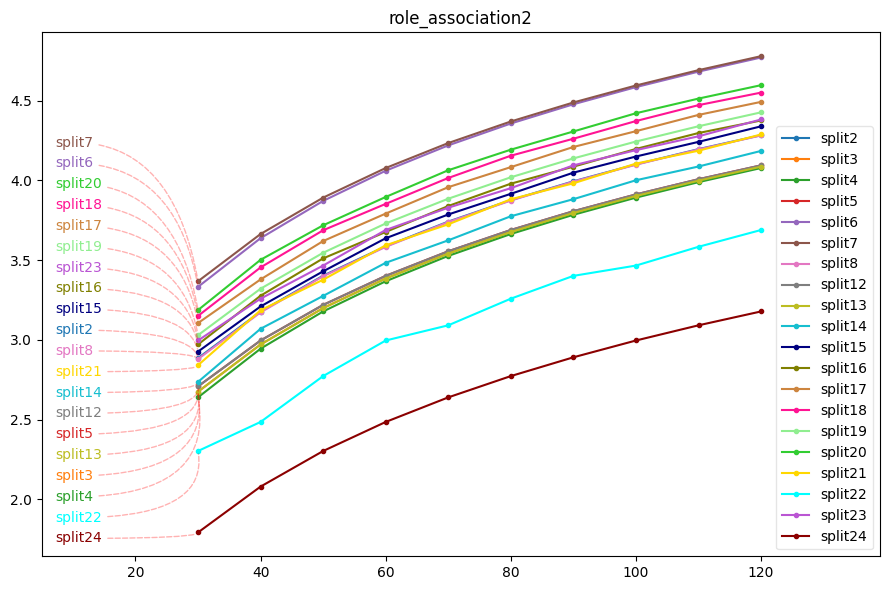

In [26]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 10+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-80"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.title(role_interference_func)
plt.tight_layout()
plt.show()

In [27]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{role_interference_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{role_interference_func}.json", "w"), indent=4)

### Concept Entropy

In [49]:
num_relations = 2
concept_entropy_func = "concept_entropy"
entropies = defaultdict(list)
T = False
N = list(range(30, 121, 10))


In [50]:
#for split in ["split2", "split12", "split20", "split22", "split23"]:
for split in ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]:
    for num_nouns in tqdm(N):
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(concept_entropy_func)(num_nouns, df))

100%|██████████| 10/10 [00:00<00:00, 44.09it/s]


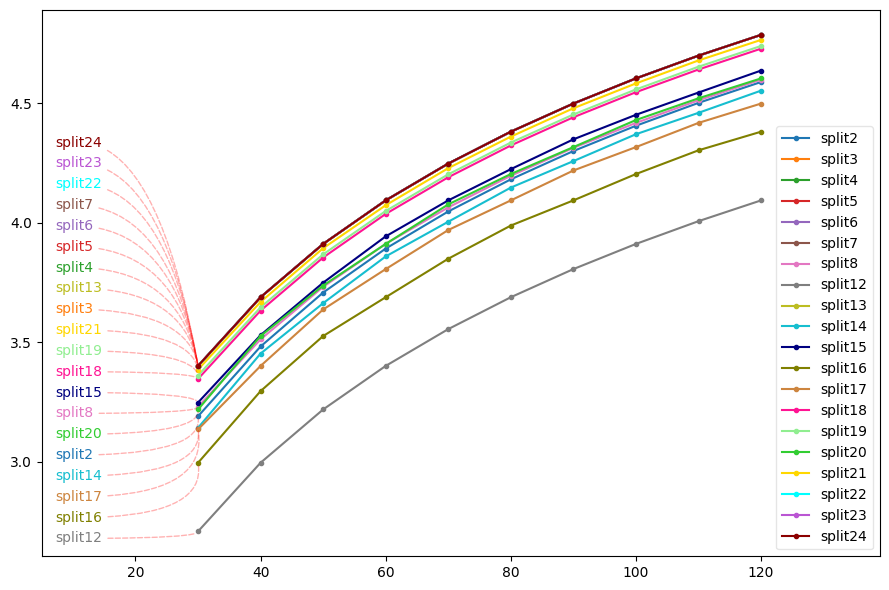

In [51]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)
for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 10+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=-80"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.tight_layout()
plt.show()

In [52]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{concept_entropy_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{concept_entropy_func}.json", "w"), indent=4)

### Concept - RoleIndex Entropy

In [41]:
num_relations = 2
concept_role_index_entropy_func = "concept_role_index_entropy"
entropies = defaultdict(list)
T = False
N = list(range(30, 121, 10))


In [42]:
#for split in ["split2", "split12", "split20", "split22", "split23"]:
for split in ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split12", "split13", "split14", "split15", "split16", "split17", "split18", "split19", "split20", "split21", "split22", "split23", "split24"]:
    for num_nouns in tqdm(N):
        df = create_synthetic_df(split, num_nouns, transpose=T)
        entropies[split].append(eval(concept_role_index_entropy_func)(num_nouns, df))

100%|██████████| 10/10 [00:00<00:00, 19.72it/s]


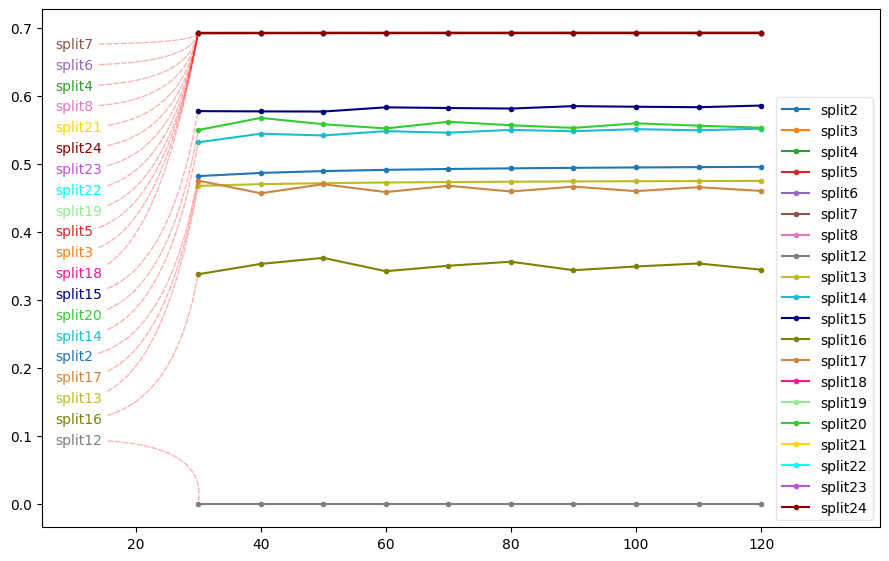

In [43]:
fig = plt.figure(figsize=(9, 6))
ax = plt.axes()
ax.set_prop_cycle(cycler('color', CMAP))
ax.set_xlim(5, N[-1]+19)

for s in entropies:
    plt.plot(N, entropies[s], ".-", label=s)
annotations = sorted([(i[0], i[1][0], c) for i, c in zip(entropies.items(), CMAP)], key=lambda x: x[1])
for i, a in enumerate(annotations):
    plt.annotate(
        a[0],
        color = a[2], 
        xy=(30, a[1]), xycoords='data',
        xytext=(10, 60+15*i), textcoords='axes points',
        arrowprops=dict(arrowstyle="-", color='red', alpha=0.3, linestyle="--",
                        connectionstyle="angle3,angleA=0,angleB=80"
                        )
    )
plt.legend(loc='lower right', framealpha=0.5)
plt.tight_layout()
plt.show()

In [44]:
dir = "metrics_transpose_R2" if T else "metrics_naive"
fig.savefig(f"../scripts/formalism/{dir}/figures/{concept_role_index_entropy_func}.png", dpi=150)
json.dump(entropies, open(f"../scripts/formalism/{dir}/json/{concept_role_index_entropy_func}.json", "w"), indent=4)

### Combine All

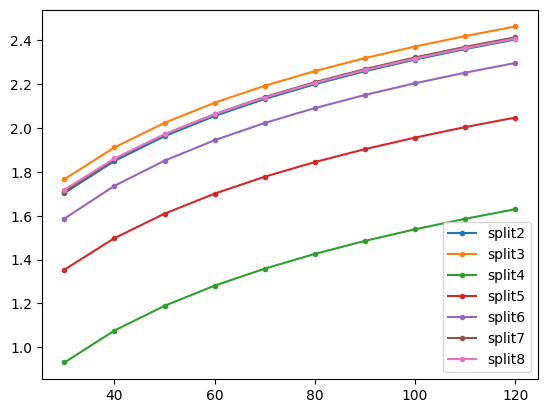

In [15]:
score_names = ["concept_centric_entropy3", 
               "concept_centric_entropy4", 
               "concept_centric_entropy5", 
               "relation_centric_entropy3", 
               "relation_centric_entropy4", 
               "relation_centric_entropy5",
               "divergence",
               "divergence2",
               "divergence3",
               "concept_role_entropy",
               #"concept_role_entropy2"
               ]
all_scores = [json.load(open(f"../scripts/formalism/{score_name}.json", "r")) for score_name in score_names]

plt.figure()
for label in all_scores[0]:
    if label == "split9": continue
    plt.plot(N, 
             np.mean([score[label] for score in all_scores], axis=0),
             ".-", label=label)
plt.legend()
plt.show()

### Steps vs Epochs

100%|██████████| 11/11 [00:00<00:00, 234.13it/s]

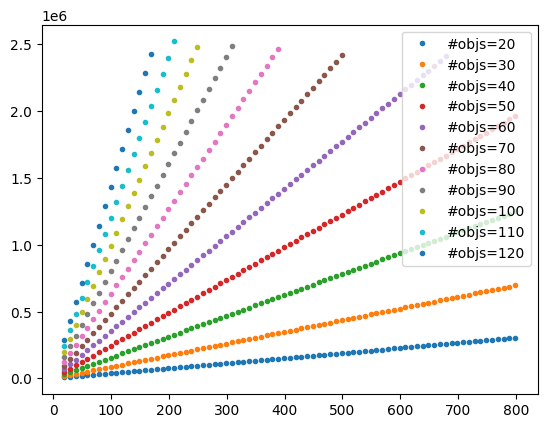

In [6]:
N = list(range(20, 121, 10))
S = ["split2", "split3", "split4", "split5", "split6", "split7", "split8", "split9"]

#for split in S:
split="split3"
plt.figure()

for num_nouns in tqdm(N):
    train_triplets, _ = eval(f"create_data_{split}")(list(range(num_nouns)))
    Y = []
    for e in range(19, 800, 10):
        Y.append(len(train_triplets)*(e+1))
        if Y[-1] > 2403000: break
    plt.plot(list(range(19, 800, 10))[:len(Y)], Y, ".", label=f"#objs={num_nouns}")

plt.legend()
plt.show()

In [7]:
for num_nouns in N:
    print(f"{num_nouns}: epoch {90*89*40/(num_nouns*(num_nouns-1))}")

20: epoch 843.1578947368421
30: epoch 368.2758620689655
40: epoch 205.3846153846154
50: epoch 130.77551020408163
60: epoch 90.50847457627118
70: epoch 66.33540372670808
80: epoch 50.69620253164557
90: epoch 40.0
100: epoch 32.36363636363637
110: epoch 26.722268557130942
120: epoch 22.436974789915965
